### 1. Import the data

In [1]:
import urllib.request
import zipfile
import os

# URL del archivo ZIP que deseas descargar
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"

# Ruta local donde deseas guardar el archivo ZIP
zip_file_path = "pizza_steak.zip"

# Descargar el archivo ZIP
urllib.request.urlretrieve(url, zip_file_path)

# Directorio donde deseas descomprimir el archivo ZIP
extracted_folder_path = ""

# Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Eliminar el archivo ZIP después de descomprimirlo
os.remove(zip_file_path)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
def view_random_image(target_dir, target_class):
  target_folder = target_dir+"/"+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


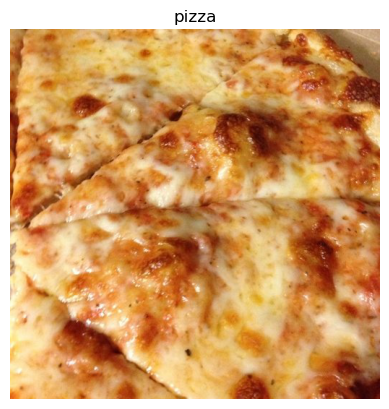

In [3]:
img = view_random_image(target_dir="pizza_steak/train",
                        target_class="pizza")

In [4]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[196, 148,  72],
        [199, 151,  77],
        [199, 152,  80],
        ...,
        [199, 163, 131],
        [199, 163, 131],
        [193, 157, 125]],

       [[199, 151,  77],
        [202, 154,  80],
        [202, 155,  83],
        ...,
        [201, 165, 133],
        [201, 165, 133],
        [195, 159, 127]],

       [[200, 152,  78],
        [203, 155,  83],
        [203, 156,  86],
        ...,
        [200, 164, 132],
        [201, 165, 133],
        [196, 160, 128]],

       ...,

       [[216,  97,  15],
        [221, 102,  22],
        [226, 105,  26],
        ...,
        [109,  26,  18],
        [107,  24,  16],
        [105,  21,  11]],

       [[216,  99,  19],
        [227, 108,  28],
        [231, 112,  32],
        ...,
        [112,  30,  19],
        [109,  25,  15],
        [102,  18,   8]],

       [[220, 103,  23],
        [232, 115,  35],
        [237, 118,  36],
        ...,
        [117,  33,  2

### 2. Preprocess the data (prepare it for a model)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Get all pixel values between 0 & 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
#Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import datagen from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               batch_size=32, # Size of minibatches to load data into
                                               target_size=(224,224), # Target size of images (height,width)
                                               class_mode="binary") # Type of data you're working with
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labes in train_data
len(images), len(labels), labels, images[:2], images[0].shape

(32,
 32,
 array([1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       dtype=float32),
 array([[[[0.41960788, 0.27058825, 0.12941177],
          [0.42352945, 0.27450982, 0.13333334],
          [0.42352945, 0.27450982, 0.13333334],
          ...,
          [0.16862746, 0.08627451, 0.08235294],
          [0.18039216, 0.08627451, 0.08627451],
          [0.18431373, 0.09019608, 0.08235294]],
 
         [[0.4039216 , 0.2509804 , 0.12156864],
          [0.41960788, 0.26666668, 0.13725491],
          [0.41176474, 0.25882354, 0.12941177],
          ...,
          [0.16862746, 0.08235294, 0.09019608],
          [0.17254902, 0.08627451, 0.09411766],
          [0.18039216, 0.08627451, 0.08627451]],
 
         [[0.39607847, 0.24313727, 0.12941177],
          [0.38823533, 0.23529413, 0.12156864],
          [0.3921569 , 0.2392157 , 0.1254902 ],
          ...,
          [0.12941177, 0.0509804 , 0.05882353],
   

### 3. Create a CNN model (start with a baseline)

a baseline is a relatively simple model or existing result that you setup when beginnening a machine learning experiment and then as you keep experimenting, you try to beat the baseline

> **how do I know what kind of architecture to use?**
>
> 🔑 In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required. 


In [30]:
# Import the materials to make the creating of our model more easier
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [33]:
# Create the model (will be the baseline)
model = Sequential([
    Conv2D(filters=10,
          kernel_size=3,
          strides=1, # default value
          padding="valid", # default value
          activation="relu",
          input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(units=1,
          activation="sigmoid")
])

### Breakdown of Conv2D layer
**Example code:** tf.keras.layers.Conv2D (filters=10, kernel_size=(3,3), strides=(1,1), padding="same").

**Example 2 (same as above):** tf.keras.layers.Conv2D (filters=10, kernel_size=3, strides=1, padding="same").

|Hyperparameter name|What does it do?|Typical values|
| :-: | :-: | :-: |
| filters | Decides how many filters should pass over an input tensor | 10, 32, 64, 128 (higher values lead to more complex models) |
| kernel_size | Determines how big the filter is  | 3, 5, 7 (lower values learn smaller features, higher values learn larger features) |
| strides | The number of steps a filter takes across an image at a time (e.g. if **strides=1**, a filter moves across an image 1 pixel at a time) | 1 (default) or 2 |
| padding | Pads the target tensor with zeroes ("same") to preserve input shape. Or leaves in the target tensor as is ("valid"), lowering output shape | "same" or "valid" |

* Watch https://poloclub.github.io/cnn-explainer/ to understand the filters (you need to click in a filter to see the process)

In [36]:
# Compile the model
model.compile(optimizer=Adam(),
              loss="binary_crossentropy",
              metrics=["accuracy"])

### 4. Fit the model

In [37]:
history = model.fit(train_data, # this is a combination of labels and sample data (parameters "x" & "y")
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 472ms/step - loss: 0.5942 - accuracy: 0.7273 - val_loss: 0.4300 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 23s 486ms/step - loss: 0.4219 - accuracy: 0.8233 - val_loss: 0.3814 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 23s 479ms/step - loss: 0.3074 - accuracy: 0.8673 - val_loss: 0.3947 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 24s 506ms/step - loss: 0.1738 - accuracy: 0.9427 - val_loss: 0.4723 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 25s 520ms/step - loss: 0.0810 - accuracy: 0.9793 - val_loss: 0.3955 - val_accuracy: 0.8440


In [40]:
 model.evaluate(test_data)

16/16 [==============================] - 2s 118ms/step - loss: 0.3955 - accuracy: 0.8440


[0.3954891860485077, 0.843999981880188]

### 5. Evaluating the model

<Axes: >

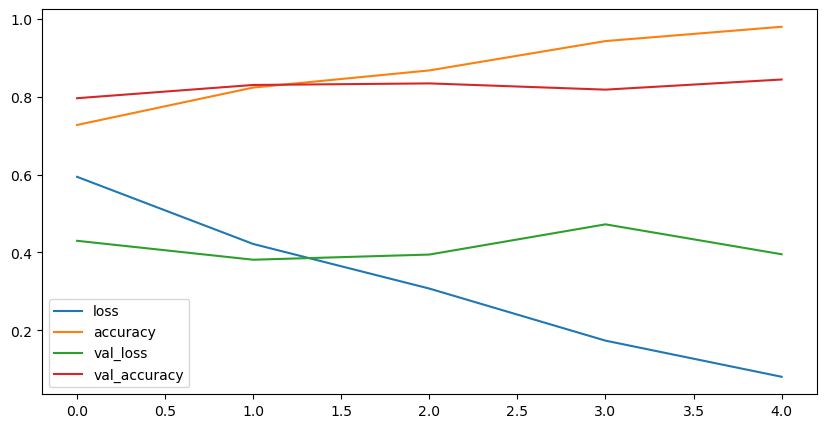

In [47]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,5))

In [48]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

>⚠️ When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset.

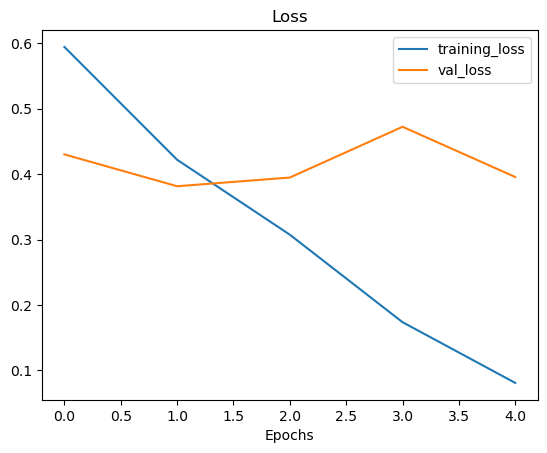

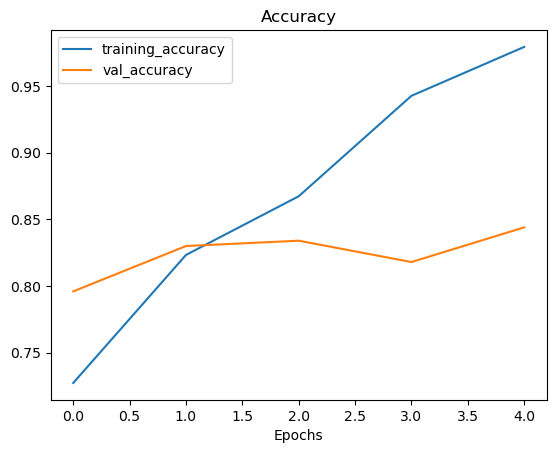

In [49]:
plot_loss_curves(history)

### 6. Adjust the model parameters
Fitting a machine learning model comes in 3 steps:

0. Create a baseline.
1. Beat the baseline by overfittinga larger model.
2. Reduce overfitting.

Ways to induce overfitting:
* Increase the number of conv layers.
* Increase the number of conv filters.
* Add another dense layer to the output of our flattened layer.

Reduce overfitting:
* Add data augmentation.
* Add regularization layers (such as MaxPool2D).
* Add more data...

In [53]:
# Create another model with more MaxPool2d layers (this is going to be the new baseline)
model_2 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(), # default is 2
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [51]:
# Compile the model
model_2.compile(optimizer=Adam(),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [52]:
# Fit the model
history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6209 - accuracy: 0.6447 - val_loss: 0.4495 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4673 - accuracy: 0.7833 - val_loss: 0.3933 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4081 - accuracy: 0.8180 - val_loss: 0.3196 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4087 - accuracy: 0.8147 - val_loss: 0.3189 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3789 - accuracy: 0.8427 - val_loss: 0.3007 - val_accuracy: 0.8800


In [60]:
# Check the differences between the total params in the first model and model_2
model.summary(), model_2.summary()
print("The params have been reduce x53")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential

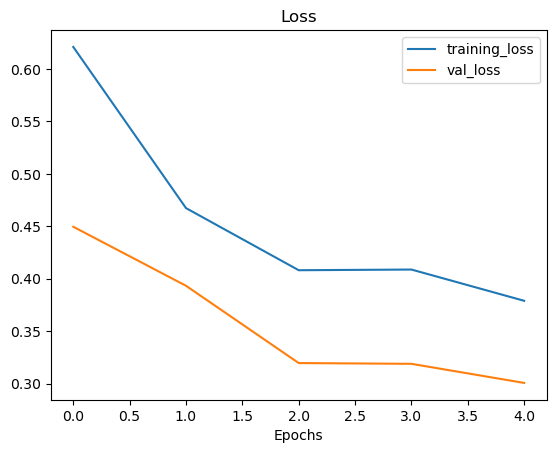

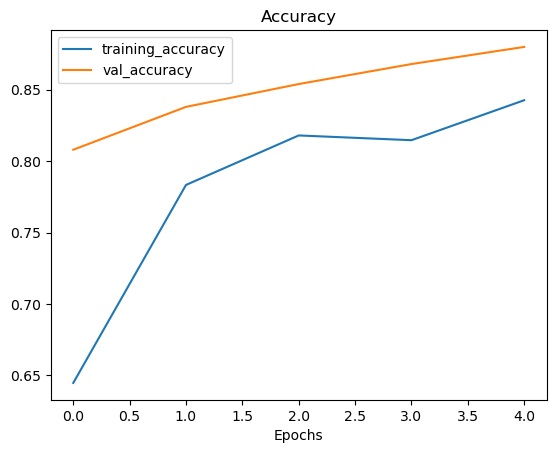

In [61]:
# Plot loss curves
plot_loss_curves(history_2)

#### Finding data augmentation (aumento de datos)

In [62]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.3,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [79]:
# Import data and augment it from training directory
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

# Create non-augmented train data batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


###### Let's visualize some augmentation data...

In [80]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing the image number: 18


(-0.5, 223.5, 223.5, -0.5)

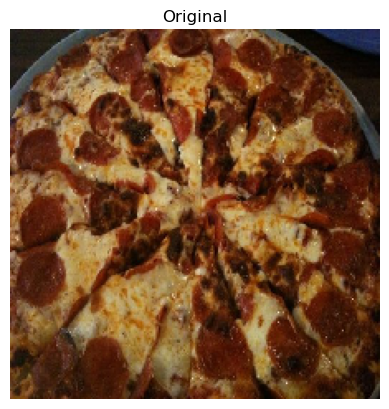

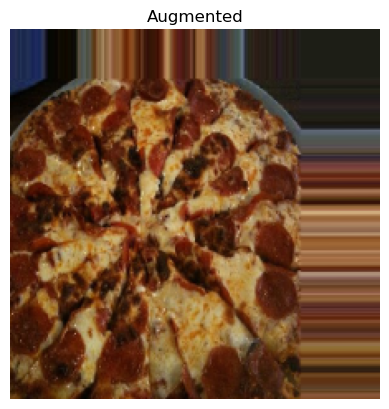

In [84]:
# Show the original and the augmented image:
import random
random_number = random.randint(0,32)
print(f"showing the image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented")
plt.axis(False)